# This script contains the following:
- Import libraries
- Load datasets
- Creation of customer profiles based on income, age, certain goods in the “department_id” column & number of dependants
- Merge with department dataset
- Creation of 'has pet' and family profiles
- Export

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Load dataset

In [3]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A4_Python/2023.08_Instacart basket analysis/02_data/'
file_path = os.path.join(path, 'prepared data', 'all_data_above_5_orders')
dept_file_path = os.path.join(path, 'prepared data', 'departments_wrangled.csv')

# Import the dataframe
df = pd.read_pickle(file_path)
df_dept = pd.read_csv(dept_file_path)

# Creation of customer profiles based on income, age, certain goods in the “department_id” column & number of dependants.


## Age groups

In [4]:
# Define age groups with different intervals
age_groups = [
    (df['age'] >= 18) & (df['age'] <= 29),
    (df['age'] >= 30) & (df['age'] <= 39),
    (df['age'] >= 40) & (df['age'] <= 49),
    (df['age'] >= 50) & (df['age'] <= 65),
    (df['age'] > 65)
]

# Define labels for each age category
age_labels = ['18-29', '30-39', '40-49', '50-65', 'over 65']

# Create the age_group column
df['age_group'] = np.select(age_groups, age_labels, default='Other')



In [5]:
# Checking implementation
df.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'age_group'],
      dtype='object')

In [6]:
# Checking the counts per age bin
df['age_group'].value_counts(dropna = False).sort_index()



18-29      6089837
30-39      5073330
40-49      5108761
50-65      8042663
over 65    8087384
Name: age_group, dtype: int64

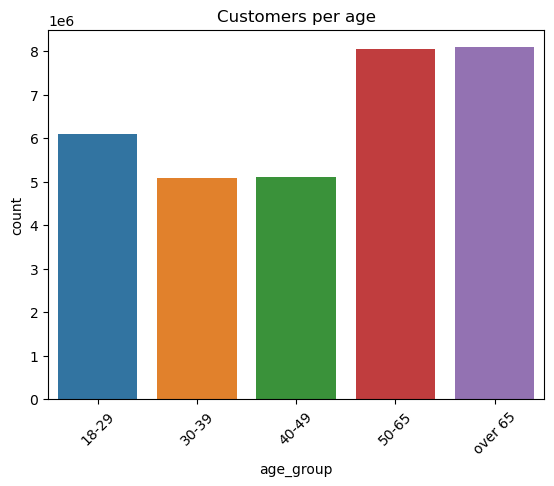

In [7]:
# display a chart to see if the bin are relevant

sns.countplot(x='age_group', data=df.sort_values(by='age_group'))
plt.title('Customers per age')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Income
based on US Census Bureau income and wealth data

In [8]:
# Define income groups
income_groups = [
    (df['income'] < 30000),  # Low income
    (df['income'] >= 30000) & (df['income'] < 75000),  # Middle income
    (df['income'] >= 75000)  # High income
]

# Define labels for each income category
income_labels = ['Low income', 'Middle income', 'High income']

# Create the income_group column
df['income_category'] = np.select(income_groups, income_labels, default='Other')


In [9]:
# Checking income_category column creation
df.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'age_group', 'income_category'],
      dtype='object')

# Merging Department dataframe

In [10]:
# Checking departemnt df
df_dept.head(100)

,Unnamed: 0,department_id,department
0,1,1,frozen
1,2,2,other
2,3,3,bakery
3,4,4,produce
4,5,5,alcohol
5,6,6,international
6,7,7,beverages
7,8,8,pets
8,9,9,dry goods pasta
9,10,10,bulk


In [11]:
# Drop the 'department_id' column from df_dept
df_dept = df_dept.drop('Unnamed: 0', axis=1)

df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
# Merging the departments dataframe with y customer dataframe
df_merge = df.merge(df_dept, on = 'department_id')

In [13]:
# Checking merging
df_merge.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,region,age_group,income_category,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages


In [14]:
# Checking merging
df_merge.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'age_group', 'income_category', 'department'],
      dtype='object')

# Create a 'has pets' flag

In [15]:
# Create a new column 'has_pets' with default value 'No'
df_merge['has_pets'] = 'No'

# Update 'has_pets' based on purchases from department_id 8 (pets)
df_merge.loc[df_merge['department_id'] == 8, 'has_pets'] = 'Yes'

# Checking
df_merge.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,fam_status,income,region,age_group,income_category,department,has_pets
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No


# Family status

In [16]:
# Create a new column 'family_type' with default value 'single adult'
df_merge['family_type'] = 'single adult'

# Update 'family_type' based on the number of dependents
df_merge.loc[df_merge['n_dependants'] == 0, 'family_type'] = 'single adult'
df_merge.loc[(df_merge['n_dependants'] == 1) | (df_merge['n_dependants'] == 2), 'family_type'] = 'small family'
df_merge.loc[df_merge['n_dependants'] >= 3, 'family_type'] = 'big family'


In [17]:
# Create a cross-tabulation of 'family_type'
family_type_crosstab = pd.crosstab(index=df_merge['family_type'], columns='count')
family_type_crosstab

col_0,count
family_type,
big family,8134436
single adult,8096749
small family,16170790


# Export

In [18]:
df_merge.to_pickle(os.path.join(path,'prepared data','all_data_above_5_orders_V2'))